<a href="https://colab.research.google.com/github/ttollefson11/IS4487/blob/main/Assignment9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# IS 4487 Assignment 9 Script



##Load Libraries

In this class we will be using 
- Pandas
- Matplotlib
- Numpy


In [1]:
import pandas as pd
import matplotlib as mpl
import numpy as np

## Getting data into Pandas 


In [2]:
from google.colab import drive 
drive.mount('/content/gdrive', force_remount=True)

df = pd.read_csv (r'/content/gdrive/MyDrive/Colab Notebooks/adviseinvest.csv')

Mounted at /content/gdrive


In [3]:
#look at the top rows
df.head(10) 

,answered,income,female,age,job,num_dependents,rent,own_res,new_car,chk_acct,sav_acct,num_accts,mobile,product
0,1,13520,0,23,0,1,1,0,0.0,0,2,0,1,2
1,0,14780,0,22,2,1,0,1,0.0,3,0,3,0,0
2,1,37570,0,62,2,1,0,0,1.0,3,0,4,0,4
3,0,12450,0,33,2,1,0,1,0.0,1,0,2,0,0
4,0,12400,0,48,1,2,0,0,1.0,2,1,4,0,0
5,1,14030,0,28,2,1,1,0,1.0,0,0,2,0,4
6,1,9320,0,24,2,1,0,1,0.0,3,0,2,0,2
7,1,11750,0,68,0,1,0,0,1.0,1,0,0,0,3
8,1,69670,0,36,3,1,1,0,0.0,1,1,3,0,4
9,1,3380,0,52,2,1,0,1,0.0,0,2,4,0,4


In [4]:
#look at the datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29504 entries, 0 to 29503
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   answered        29504 non-null  int64  
 1   income          29504 non-null  int64  
 2   female          29504 non-null  int64  
 3   age             29504 non-null  int64  
 4   job             29504 non-null  int64  
 5   num_dependents  29504 non-null  int64  
 6   rent            29504 non-null  int64  
 7   own_res         29504 non-null  int64  
 8   new_car         29502 non-null  float64
 9   chk_acct        29504 non-null  int64  
 10  sav_acct        29504 non-null  int64  
 11  num_accts       29504 non-null  int64  
 12  mobile          29504 non-null  int64  
 13  product         29504 non-null  int64  
dtypes: float64(1), int64(13)
memory usage: 3.2 MB


In [5]:
#describe the data before cleaning it
df.describe()

,answered,income,female,age,job,num_dependents,rent,own_res,new_car,chk_acct,sav_acct,num_accts,mobile,product
count,29504.000000,29504.000000,29504.000000,29504.000000,29504.000000,29504.000000,29504.000000,29504.000000,29502.000000,29504.000000,29504.000000,29504.000000,29504.000000,29504.000000
mean,0.546638,33766.893303,0.054230,34.770065,1.915401,1.140998,0.210412,0.681128,0.240797,1.468547,0.956616,2.458175,0.091106,1.535792
std,0.497829,29379.202710,0.226475,11.355777,0.658183,0.348025,0.407608,0.466047,0.427575,1.234727,1.483946,19.497353,0.287765,1.625916
min,0.000000,-65600.000000,0.000000,19.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,13550.000000,0.000000,26.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000
50%,1.000000,23310.000000,0.000000,32.000000,2.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,2.000000,0.000000,1.000000
75%,1.000000,41690.000000,0.000000,40.000000,2.000000,1.000000,0.000000,1.000000,0.000000,3.000000,2.000000,3.000000,0.000000,3.000000
max,1.000000,159450.000000,1.000000,74.000000,3.000000,2.000000,1.000000,1.000000,1.000000,3.000000,4.000000,3345.000000,1.000000,4.000000


## Clean up the data
- Remove rows with NAs
- Remove the row with the single outlier in num_accts. Filter with a logical condition
- Remove the rows with negative income values


In [6]:
df_clean = df.dropna()
df_clean = df_clean[(df_clean['num_accts'] < 20)]
df_clean = df_clean[(df_clean['income'] >= 0)]
df_clean.describe()

,answered,income,female,age,job,num_dependents,rent,own_res,new_car,chk_acct,sav_acct,num_accts,mobile,product
count,29499.000000,29499.000000,29499.000000,29499.000000,29499.000000,29499.000000,29499.000000,29499.000000,29499.000000,29499.000000,29499.000000,29499.000000,29499.000000,29499.000000
mean,0.546595,33772.499407,0.054171,34.768840,1.915421,1.141022,0.210448,0.681074,0.240788,1.468355,0.956270,2.344859,0.091088,1.535747
std,0.497833,29374.485379,0.226359,11.354486,0.658216,0.348050,0.407634,0.466068,0.427569,1.234700,1.483765,1.200390,0.287739,1.625958
min,0.000000,2760.000000,0.000000,19.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,13550.000000,0.000000,26.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000
50%,1.000000,23310.000000,0.000000,32.000000,2.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,2.000000,0.000000,1.000000
75%,1.000000,41690.000000,0.000000,40.000000,2.000000,1.000000,0.000000,1.000000,0.000000,3.000000,2.000000,3.000000,0.000000,3.000000
max,1.000000,159450.000000,1.000000,74.000000,3.000000,2.000000,1.000000,1.000000,1.000000,3.000000,4.000000,4.000000,1.000000,4.000000


## Assignment Question 1
Recode the variable "answered" which is coded 0/1.  Turn 1 into  "yes" and  0 into "no," then turn it into a categorical variable. (This is worth doing because not all audiences will know what a 0 vs. a 1 means for "answered.") 

Plot "answered" against "num_accts".  Take care to choose the appropriate plot type for showing the relationship between a categorical and a numeric or count variable.  Which plot type would be appropriate: histogram? scatterplot? boxplot? line plot? barplot?

In [8]:
df_clean.loc[df_clean['answered'] == 1, 'answered'] = "yes" 
df_clean.loc[df_clean['answered'] == 0, 'answered'] = "no"
df_clean['answered'] = df_clean['answered'].astype('category')

<Axes: title={'center': 'Number of Answered Phone Calls per Number of Accounts Owned'}, xlabel='Number of Accounts', ylabel='Answered'>

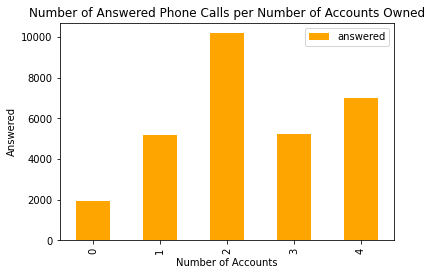

In [32]:
df_clean[['num_accts','answered']].groupby('num_accts').count().plot.bar(color = 'orange', xlabel = 'Number of Accounts', ylabel = 'Answered', title = 'Number of Answered Phone Calls per Number of Accounts Owned')

## Assignment Question 2
Create a barplot of the counts or proportions of customers who answered, comparing those with and without mobile phones.

This is a tricky plot to construct.  Here are the steps:

Turn "mobile" into a categorical variable. Your plot will work better with this change.
Create a table of the counts for "answered" at each level of "mobile."   

Send the resulting two summary table into your charting tool 

Required:  A barplot of counts of customers who answered ("Yes" or "No") for each level of mobile.  Include a title and appropriately labeled and scaled axes. 

Challenge:   A barplot of the proportions of customers who answered ("Yes" or "No") for each level of mobile.  

<Axes: title={'center': 'Number of Answered Phone Calles per Mobile Phone'}, xlabel='Mobile Phone', ylabel='Answered'>

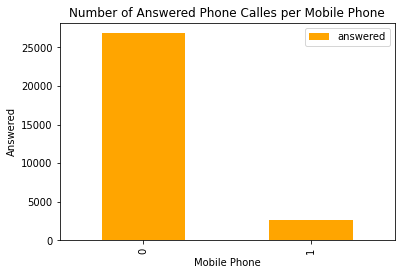

In [34]:
df_clean['mobile'] = df_clean['mobile'].astype('category')

df_clean[['mobile','answered']].groupby('mobile').count().plot.bar(color = 'orange', xlabel = 'Mobile Phone', ylabel = 'Answered', title = 'Number of Answered Phone Calles per Mobile Phone')

In [40]:
df_clean.loc[df_clean['mobile'] == 0].count()

answered          26812
income            26812
female            26812
age               26812
job               26812
num_dependents    26812
rent              26812
own_res           26812
new_car           26812
chk_acct          26812
sav_acct          26812
num_accts         26812
mobile            26812
product           26812
dtype: int64

# Standardize attributes

- Convert the "college" and "considering_change_of_plan" attributes to 0 or 1
- Convert non-numeric attributes to numeric scale of 1-3


In [ ]:
df_clean.loc[df_clean['college'] == 'one', 'college'] = "1" 
df_clean.loc[df_clean['college'] == 'zero', 'college'] = "0"
df_clean.loc[df_clean['reported_satisfaction'] == 'low', 'reported_satisfaction'] = "1"
df_clean.loc[df_clean['reported_satisfaction'] == 'avg', 'reported_satisfaction'] = "2"
df_clean.loc[df_clean['reported_satisfaction'] == 'high', 'reported_satisfaction'] = "3"
df_clean.loc[df_clean['reported_usage_level'] == 'low', 'reported_usage_level'] = "1"
df_clean.loc[df_clean['reported_usage_level'] == 'avg', 'reported_usage_level'] = "2"
df_clean.loc[df_clean['reported_usage_level'] == 'high', 'reported_usage_level'] = "3"
df_clean.loc[df_clean['considering_change_of_plan'] == 'yes', 'considering_change_of_plan'] = "1"
df_clean.loc[df_clean['considering_change_of_plan'] == 'no', 'considering_change_of_plan'] = "0"
df_clean.loc[df_clean['considering_change_of_plan'] == 'maybe', 'considering_change_of_plan'] = "0.5"

df_clean['college'] = df_clean['college'].astype('int') 
df_clean['reported_satisfaction'] = df_clean['reported_satisfaction'].astype('int') 
df_clean['reported_usage_level'] = df_clean['reported_usage_level'].astype('int') 
df_clean['considering_change_of_plan'] = df_clean['considering_change_of_plan'].astype('float') 

df_clean.head(10) 